<h1 style="font-size:32px; color:Black;">Step 1: Data Preprocessing and Feature Engineering</h1>

In [3]:
import pandas as pd

df = pd.read_csv("Supply_chain_data_updated.csv")

display(df.head())

display(df.info())

display(df.describe(include = 'all'))

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Promotion,Date,ProductID,EconomicIndicators,Weather
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,NaN,2016-01-21,HC001,107.15,Cloudy
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,NaN,2016-01-22,SK001,110.17,Cloudy
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,Discount10,2016-01-23,HC002,106.17,Cloudy
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,Discount10,2016-01-24,SK002,116.05,Sunny
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,FlashSale,2016-01-25,SK003,97.29,Rainy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

None

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Promotion,Date,ProductID,EconomicIndicators,Weather
count,100,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,...,100,100.000000,100,100,100.000000,70,100,100,100.00000,100
unique,3,100,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,3,NaN,4,3,NaN,3,100,100,NaN,4
top,skincare,SKU0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,...,Pending,NaN,Road,Route A,NaN,FlashSale,2016-01-21,HC001,NaN,Cloudy
freq,40,1,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,41,NaN,29,43,NaN,27,1,1,NaN,31
mean,NaN,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,...,NaN,2.277158,NaN,NaN,529.245782,NaN,NaN,NaN,100.82910,NaN
std,NaN,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,...,NaN,1.461366,NaN,NaN,258.301696,NaN,NaN,NaN,11.95896,NaN
min,NaN,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,...,NaN,0.018608,NaN,NaN,103.916248,NaN,NaN,NaN,80.27000,NaN
25%,NaN,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,...,NaN,1.009650,NaN,NaN,318.778455,NaN,NaN,NaN,90.72500,NaN
50%,NaN,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,...,NaN,2.141863,NaN,NaN,520.430444,NaN,NaN,NaN,100.86500,NaN
75%,NaN,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,...,NaN,3.563995,NaN,NaN,763.078231,NaN,NaN,NaN,110.54250,NaN


Handle Missing Values: Add a new category

In [4]:
df['Promotion'].fillna('NoPromo', inplace=True)
display(df.head(10))

C:\Users\jianl\AppData\Local\Temp\ipykernel_12812\1513544716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promotion'].fillna('NoPromo', inplace=True)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Promotion,Date,ProductID,EconomicIndicators,Weather
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,NoPromo,2016-01-21,HC001,107.15,Cloudy
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,NoPromo,2016-01-22,SK001,110.17,Cloudy
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,Discount10,2016-01-23,HC002,106.17,Cloudy
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,Discount10,2016-01-24,SK002,116.05,Sunny
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,FlashSale,2016-01-25,SK003,97.29,Rainy
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Fail,2.779194,Road,Route A,235.461237,BOGO,2016-01-26,HC003,100.07,Snowy
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Pending,1.000911,Sea,Route A,134.369097,FlashSale,2016-01-27,SK004,80.60,Cloudy
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Fail,0.398177,Road,Route C,802.056312,NoPromo,2016-01-28,CM001,95.15,Sunny
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Pending,2.709863,Sea,Route B,505.557134,FlashSale,2016-01-29,CM002,116.12,Rainy
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Pending,3.844614,Rail,Route B,995.929461,NoPromo,2016-01-30,SK005,80.67,Sunny


Convert and Extract Date Features

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)
display(df.head(20))


## Weekend - 1
## Weekdays - 0

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Routes,Costs,Promotion,Date,ProductID,EconomicIndicators,Weather,Month,DayOfWeek,IsWeekend
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Route B,187.752075,NoPromo,2016-01-21,HC001,107.15,Cloudy,1,3,0
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Route B,503.065579,NoPromo,2016-01-22,SK001,110.17,Cloudy,1,4,0
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Route C,141.920282,Discount10,2016-01-23,HC002,106.17,Cloudy,1,5,1
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Route A,254.776159,Discount10,2016-01-24,SK002,116.05,Sunny,1,6,1
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Route A,923.440632,FlashSale,2016-01-25,SK003,97.29,Rainy,1,0,0
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Route A,235.461237,BOGO,2016-01-26,HC003,100.07,Snowy,1,1,0
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Route A,134.369097,FlashSale,2016-01-27,SK004,80.60,Cloudy,1,2,0
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Route C,802.056312,NoPromo,2016-01-28,CM001,95.15,Sunny,1,3,0
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Route B,505.557134,FlashSale,2016-01-29,CM002,116.12,Rainy,1,4,0
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Route B,995.929461,NoPromo,2016-01-30,SK005,80.67,Sunny,1,5,1


Encode Categorical Variables

In [6]:
categorical_cols = [
    'Product type', 'Customer demographics', 'Shipping carriers',
    'Supplier name', 'Location', 'Inspection results',
    'Transportation modes', 'Routes', 'Promotion', 'Weather'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


df_encoded.head(15)


,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,...,Transportation modes_Road,Transportation modes_Sea,Routes_Route B,Routes_Route C,Promotion_Discount10,Promotion_FlashSale,Promotion_NoPromo,Weather_Rainy,Weather_Snowy,Weather_Sunny
0,SKU0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,...,1,0,1,0,0,0,1,0,0,0
1,SKU1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,...,1,0,1,0,0,0,1,0,0,0
2,SKU2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,...,0,0,0,1,1,0,0,0,0,0
3,SKU3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,...,0,0,0,0,1,0,0,0,0,1
4,SKU4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,...,0,0,0,0,0,1,0,1,0,0
5,SKU5,1.699976,87,147,2828.348746,90,27,66,3,4.444099,...,1,0,0,0,0,0,0,0,1,0
6,SKU6,4.078333,48,65,7823.476560,11,15,58,8,3.880763,...,0,1,0,0,0,1,0,0,0,0
7,SKU7,42.958384,59,426,8496.103813,93,17,11,1,2.348339,...,1,0,0,1,0,0,1,0,0,1
8,SKU8,68.717597,78,150,7517.363211,5,10,15,7,3.404734,...,0,1,1,0,0,1,0,1,0,0
9,SKU9,64.015733,35,980,4971.145988,14,27,83,1,7.166645,...,0,0,1,0,0,0,1,0,0,1


Drop Unnecessary Columns

In [7]:
df_encoded.drop(columns=['SKU', 'ProductID', 'Date'], inplace=True, errors='ignore')
display(df_encoded.head())

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,...,Transportation modes_Road,Transportation modes_Sea,Routes_Route B,Routes_Route C,Promotion_Discount10,Promotion_FlashSale,Promotion_NoPromo,Weather_Rainy,Weather_Snowy,Weather_Sunny
0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,29,...,1,0,1,0,0,0,1,0,0,0
1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,23,...,1,0,1,0,0,0,1,0,0,0
2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,12,...,0,0,0,1,1,0,0,0,0,0
3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,24,...,0,0,0,0,1,0,0,0,0,1
4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,5,...,0,0,0,0,0,1,0,1,0,0


Scale numerical features

In [8]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include = ['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Number of products sold']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
#df_encoded.head()

<h1 style="font-size:32px; color:Black;"> Step 2: Exploratory Data Analysis(EDA)

Target Variable Analysis

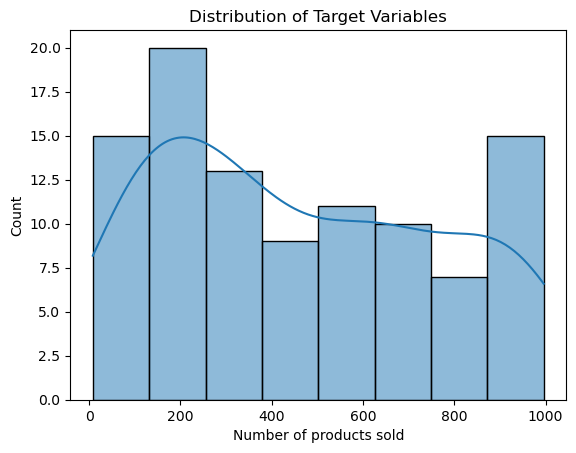

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_encoded['Number of products sold'], kde=True)
plt.title("Distribution of Target Variables")
plt.show()

Correlation Heatmap

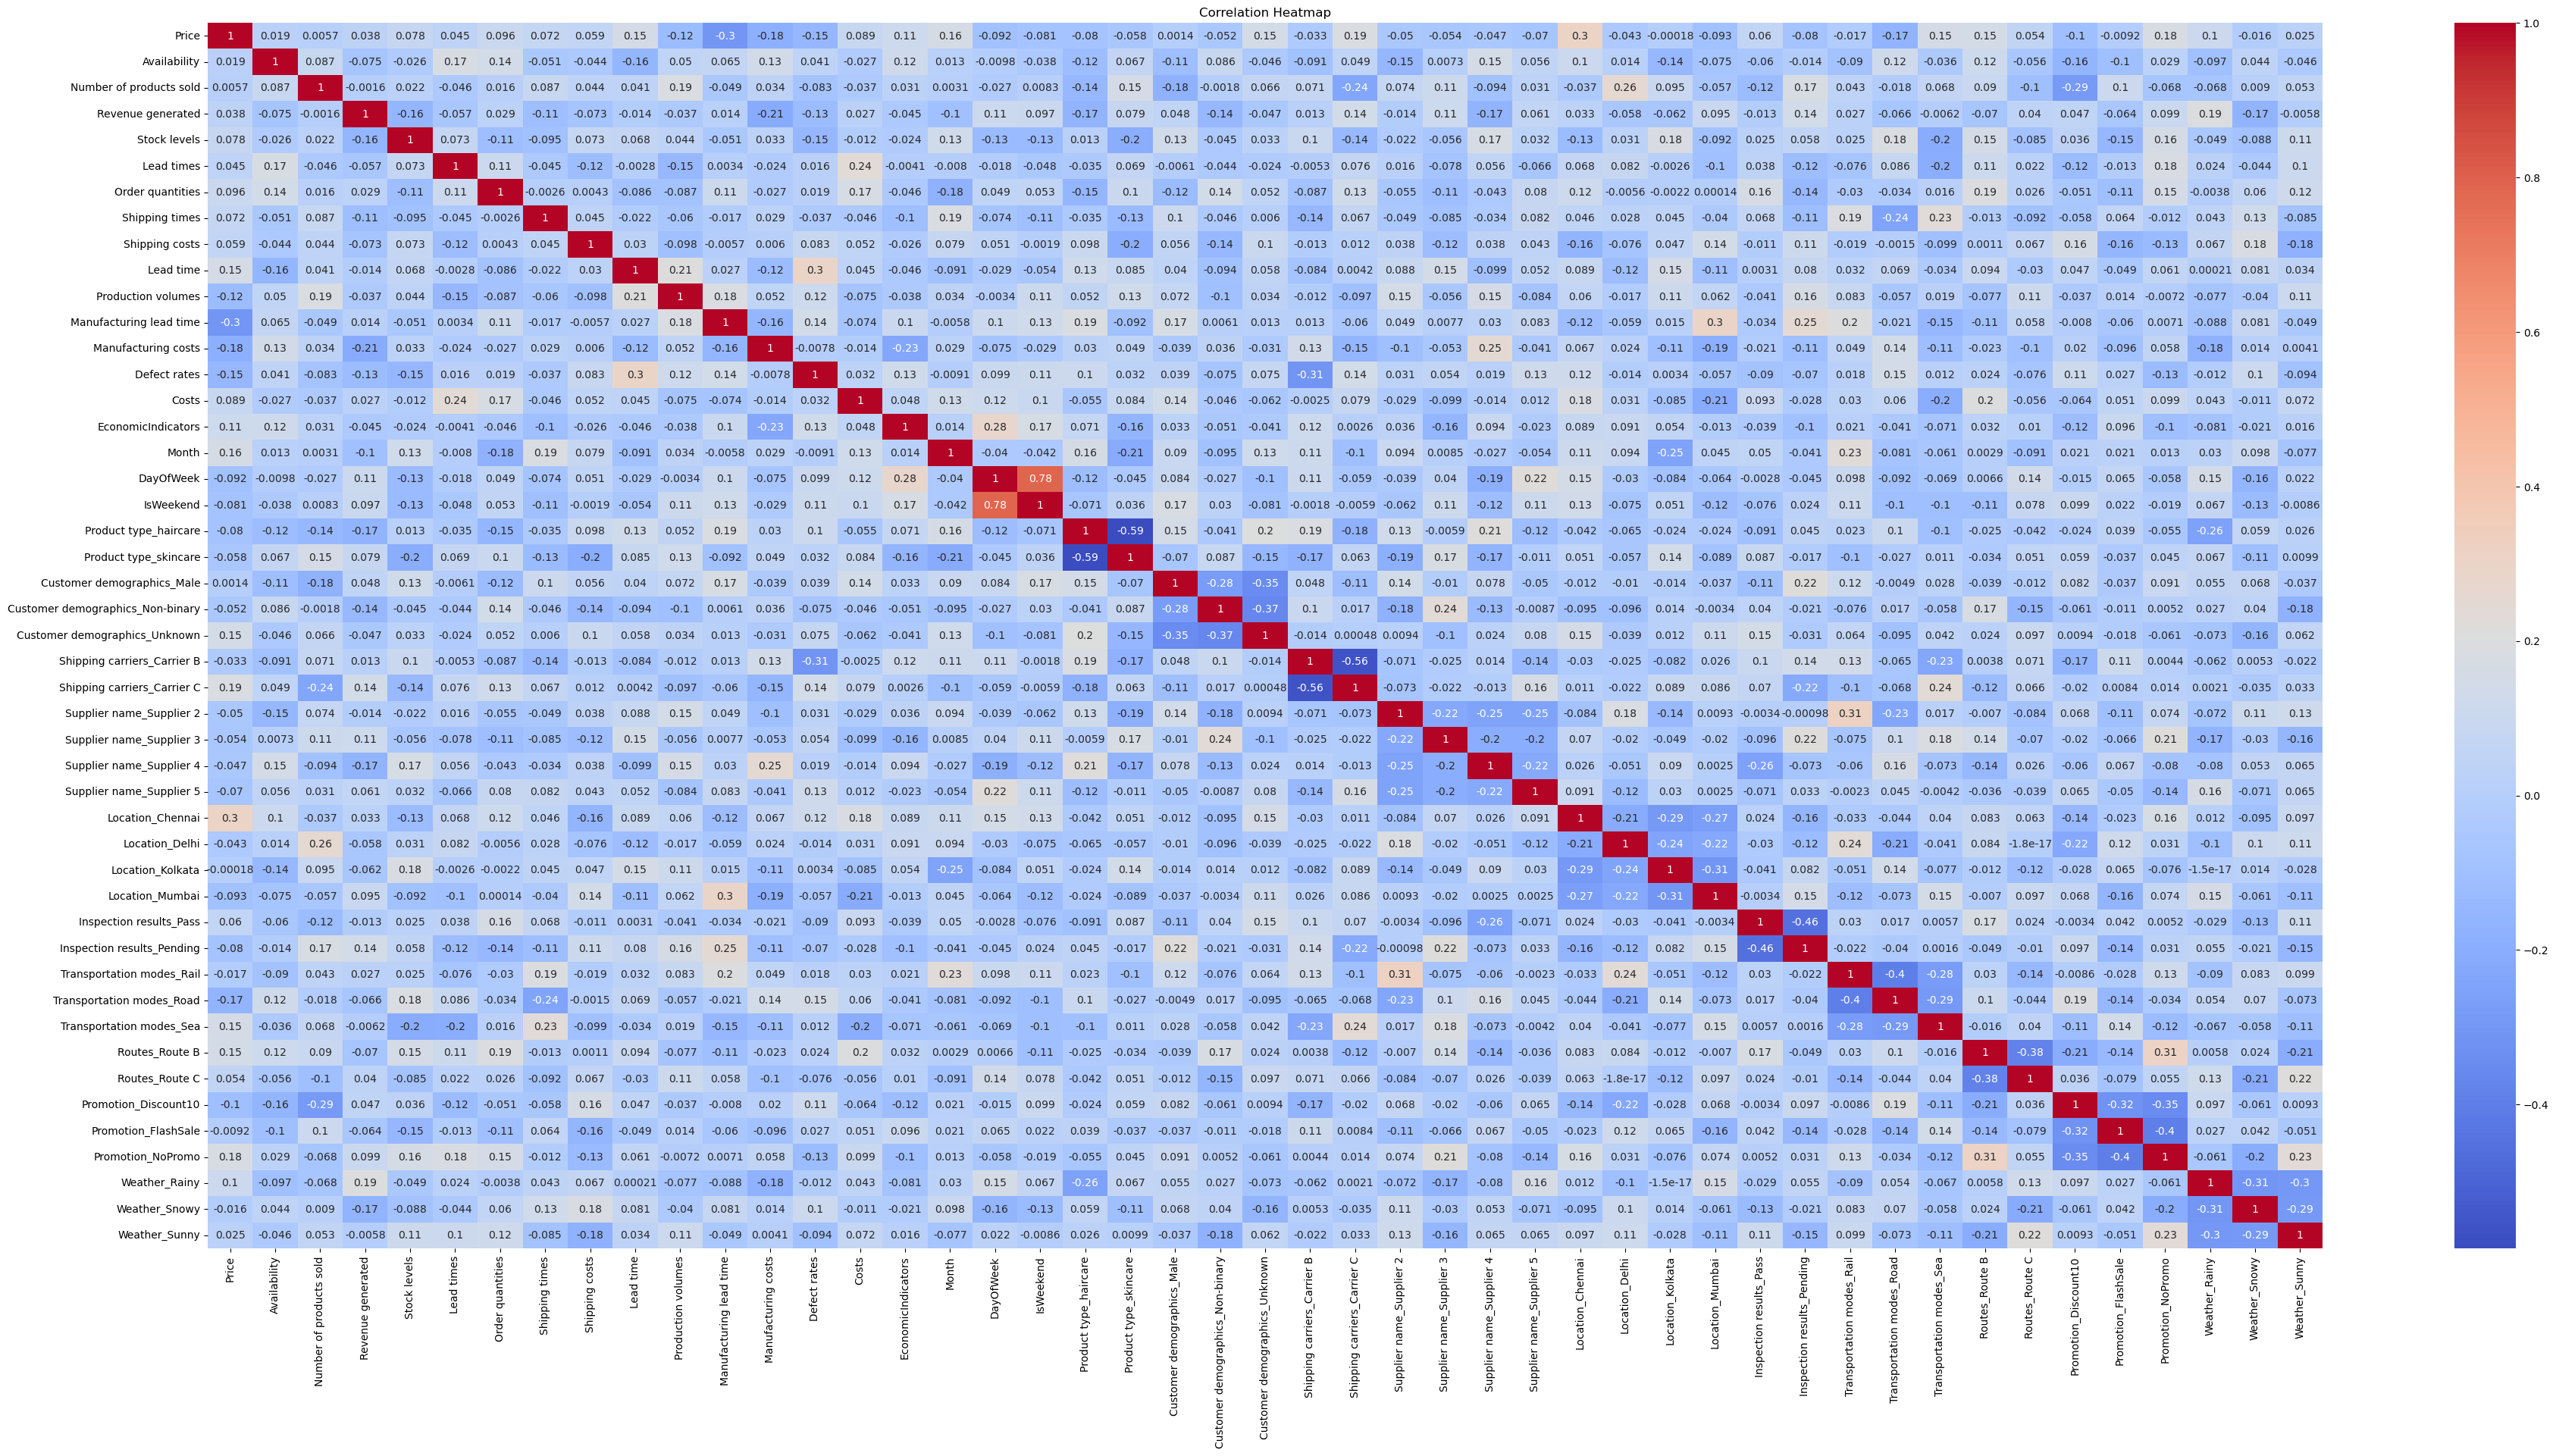

In [10]:
plt.figure(figsize=(45,21))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Select Important Features

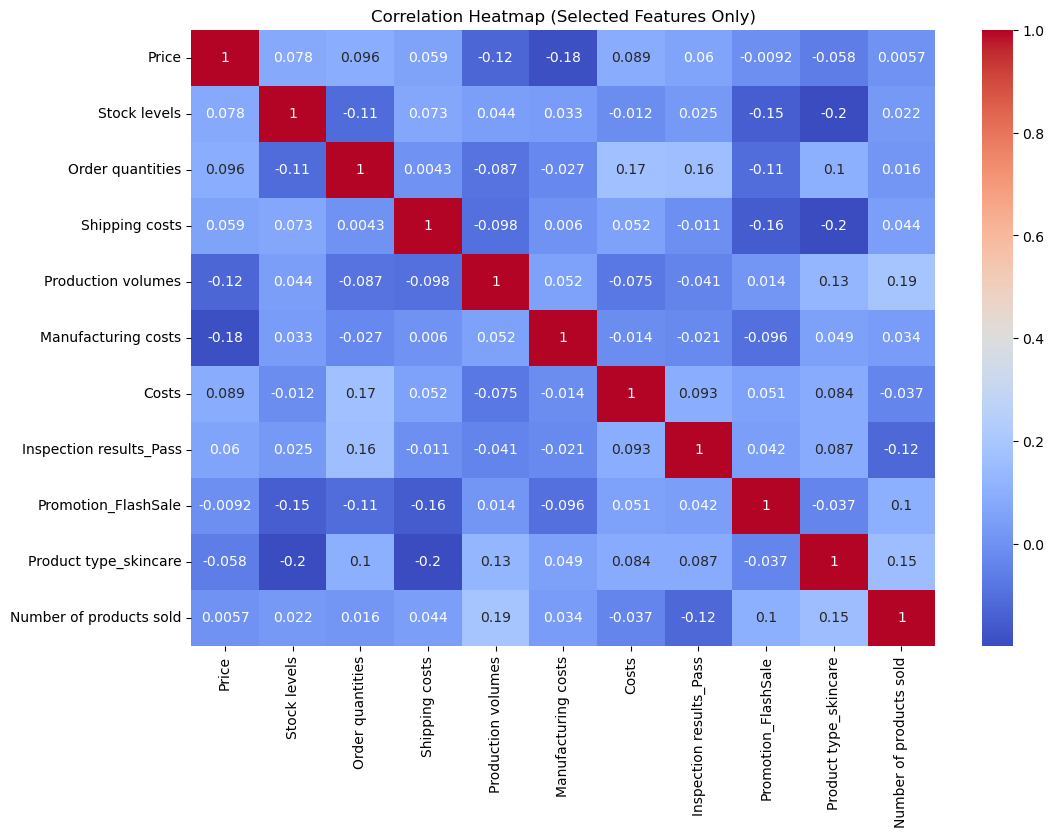

In [11]:
selected_features = [
    'Price',
    'Stock levels',
    'Order quantities',
    'Shipping costs',
    'Production volumes',
    'Manufacturing costs',
    'Costs',
    'Inspection results_Pass',
    'Promotion_FlashSale',
    'Product type_skincare'
]

# Include target for correlation heatmap
df_cleaned = df_encoded[selected_features + ['Number of products sold']].copy()

# Split features and target
X = df_cleaned[selected_features]
y = df_cleaned['Number of products sold']

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features Only)")
plt.show()


Save the df_cleaned DataFrame

In [12]:
df_cleaned.to_csv('cleaned_supply_chain_data.csv', index=False)
display(df_cleaned.head())

,Price,Stock levels,Order quantities,Shipping costs,Production volumes,Manufacturing costs,Costs,Inspection results_Pass,Promotion_FlashSale,Product type_skincare,Number of products sold
0,0.656055,0.327757,1.755336,-0.982370,-1.348115,-0.034220,-1.328733,0,0,0,802
1,-1.116309,0.167563,-0.458534,1.580095,-0.194247,-0.473338,-0.101866,0,0,1,736
2,-1.229938,-1.498456,1.455150,0.950057,1.540376,-0.574899,-1.507062,0,0,0,8
3,0.377302,-0.793602,0.366977,-1.447482,1.410470,-0.403708,-1.067946,0,0,1,83
4,-1.439992,-1.370301,0.254407,-0.628335,-0.587785,1.553476,1.533791,0,1,1,871


Top Features vs Target

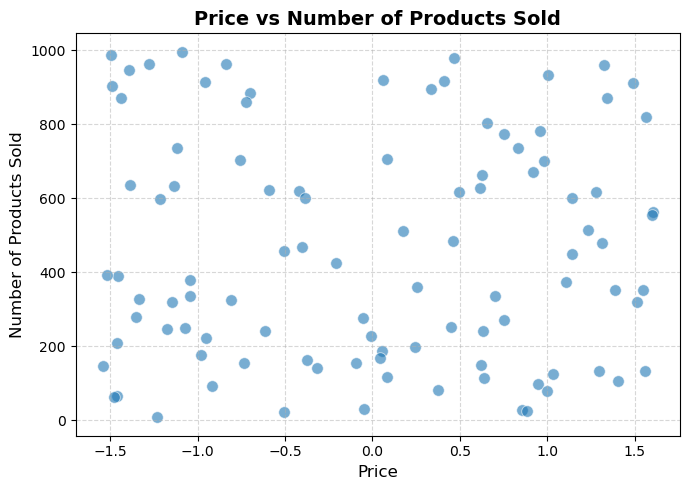

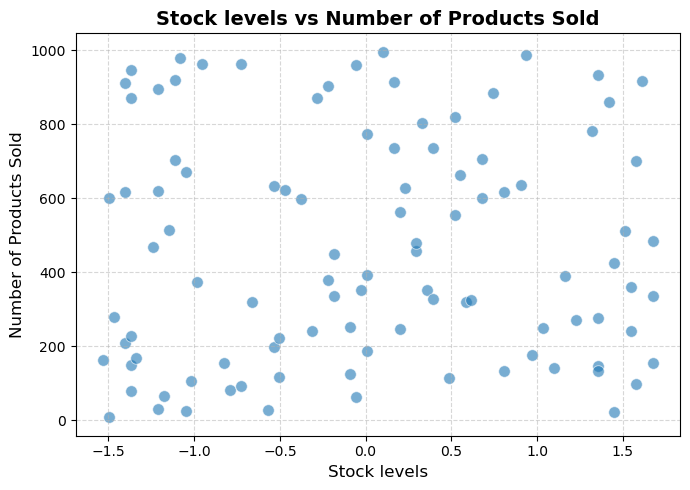

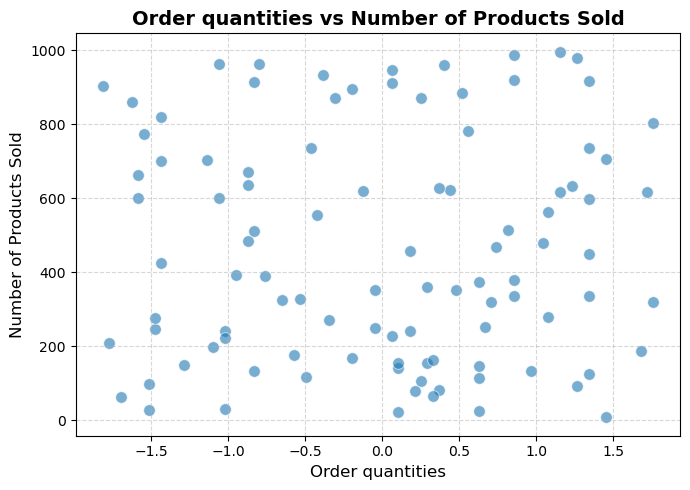

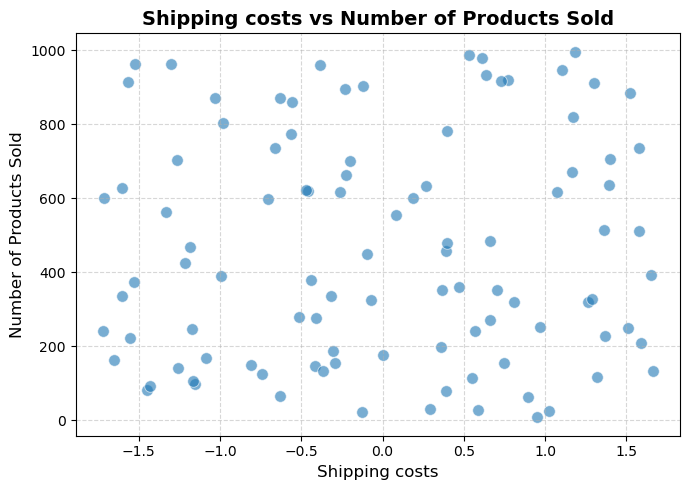

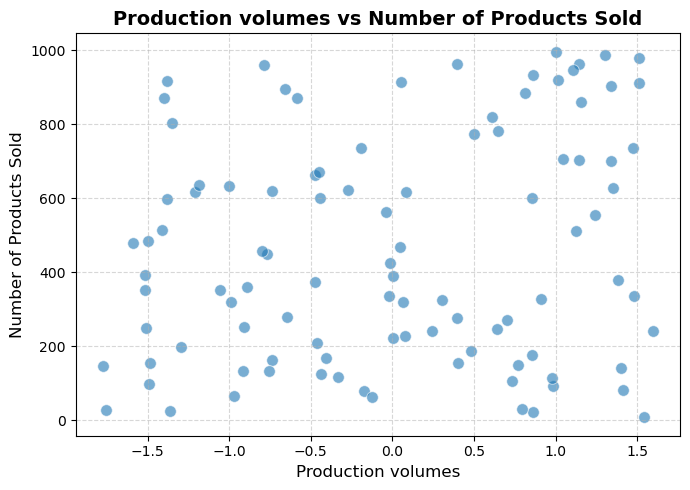

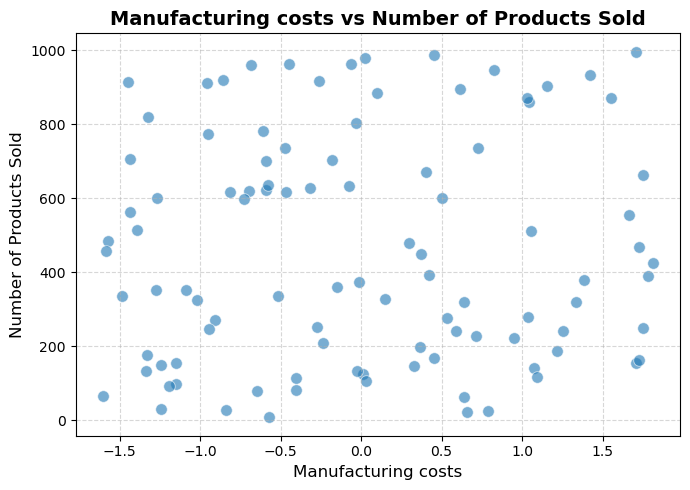

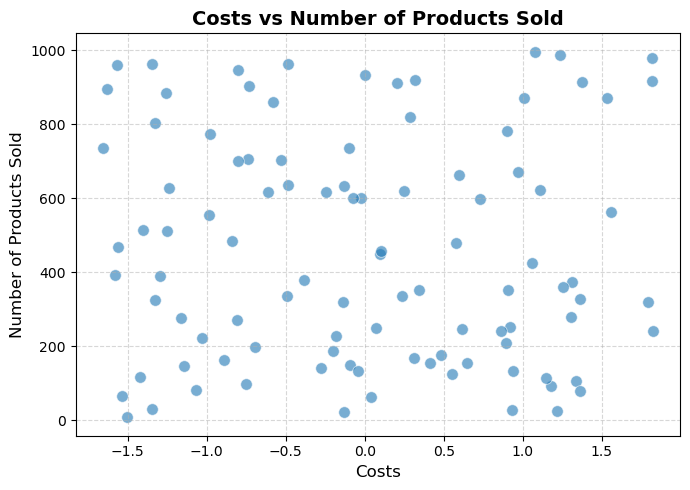

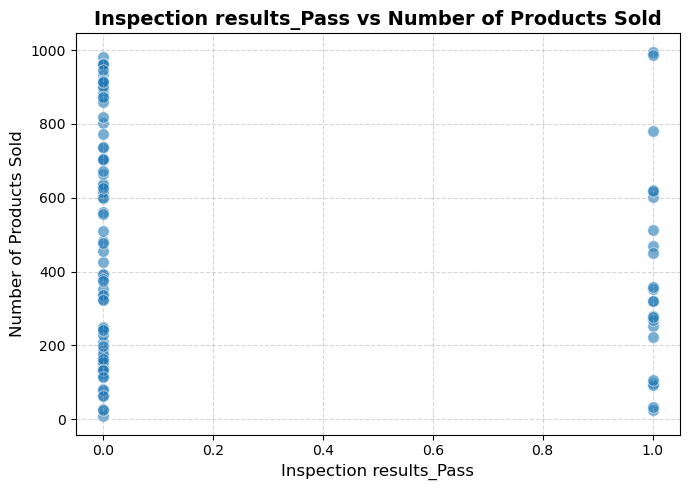

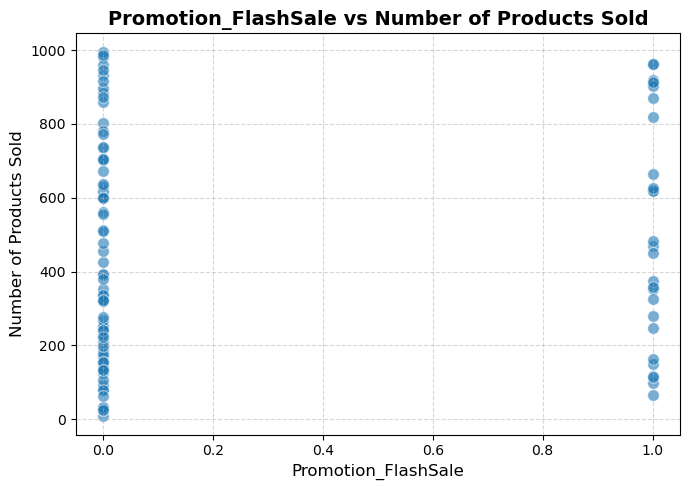

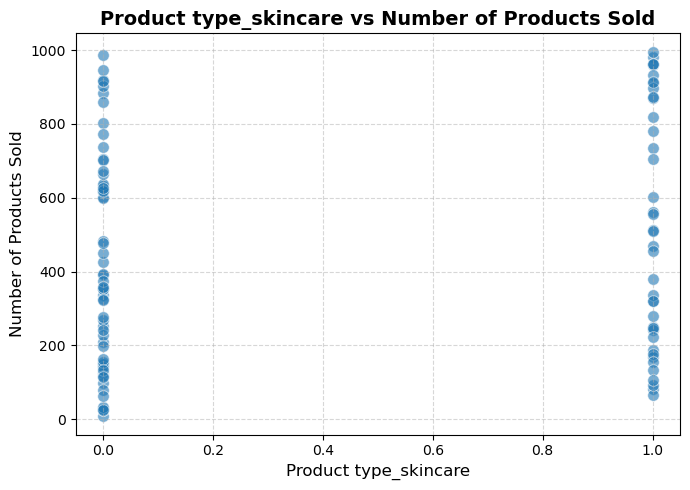

In [13]:
"""
import matplotlib.pyplot as plt
import seaborn as sns
"""
for col in selected_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        x=df_cleaned[col],
        y=df_cleaned['Number of products sold'],
        alpha=0.6,              # makes overlapping points more transparent
        edgecolor='w',          # adds white edge to points for visibility
        s=70                    # size of the points
    )
    
    # Optional: Add a trend line
    # sns.regplot(x=df_cleaned[col], y=df_cleaned['Number of products sold'], scatter=False, color='red', ci=None)

    plt.title(f'{col} vs Number of Products Sold', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Number of Products Sold', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Categorical Impact on Target

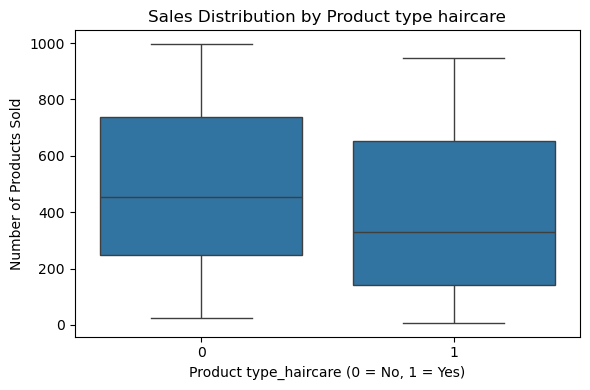

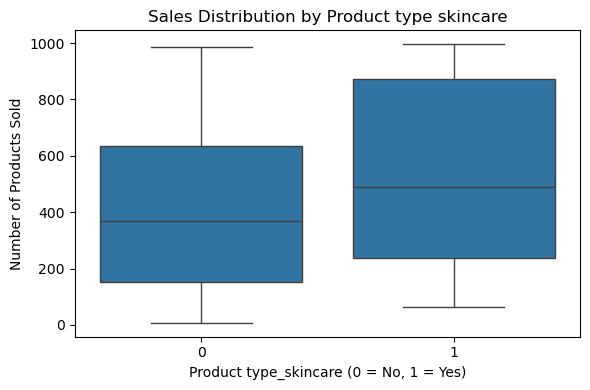

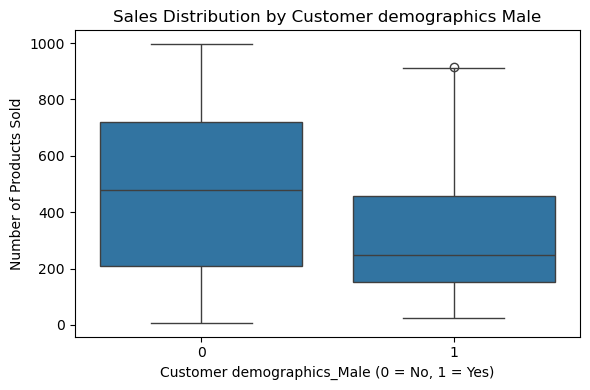

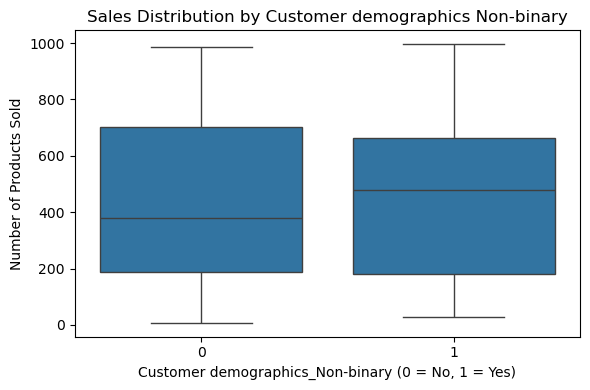

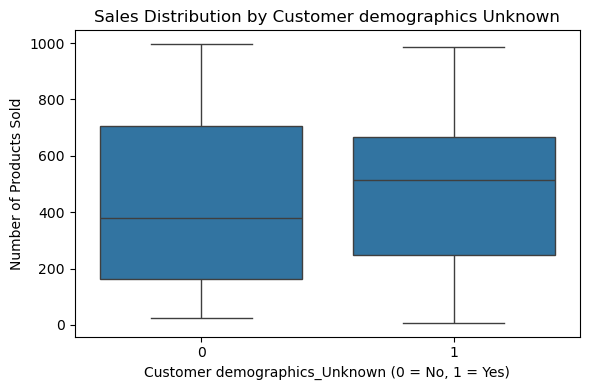

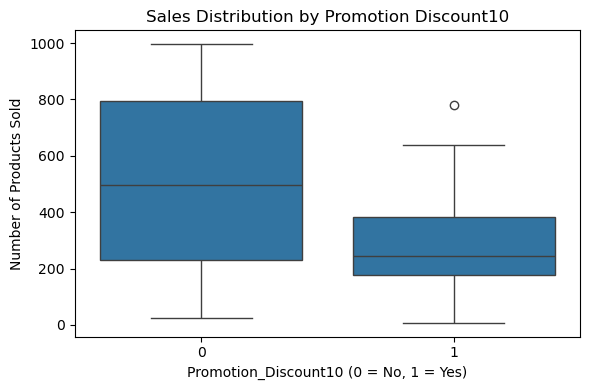

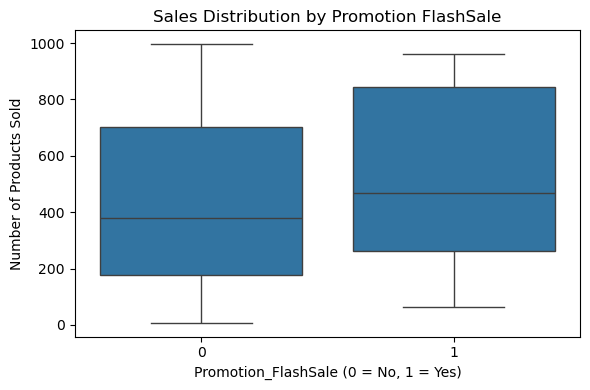

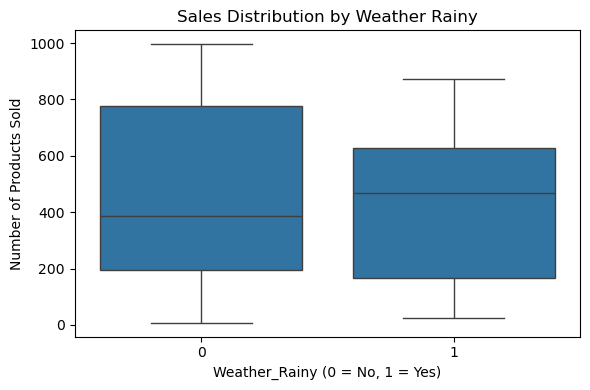

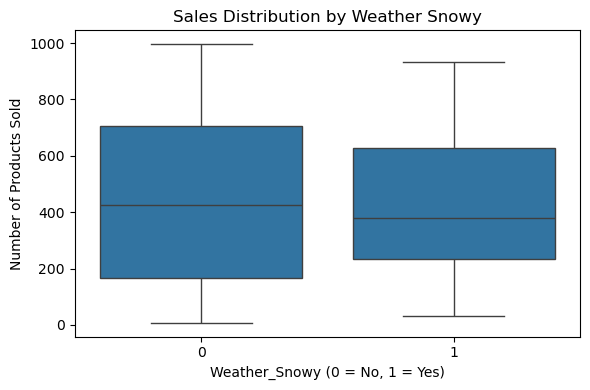

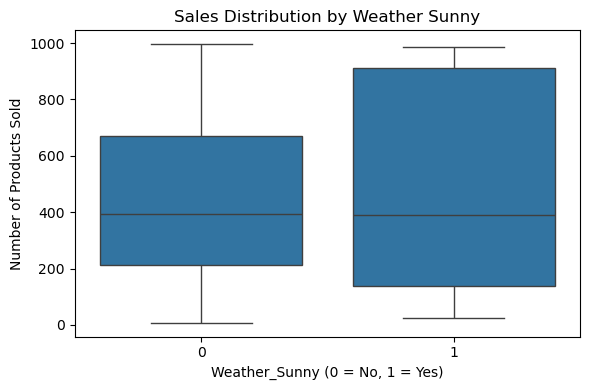

In [14]:
one_hot_columns = [
    'Product type_haircare', 'Product type_skincare',
    'Customer demographics_Male', 'Customer demographics_Non-binary',
    'Customer demographics_Unknown',
    'Promotion_Discount10', 'Promotion_FlashSale',
    'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny'
]
for col in one_hot_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[col], y=df_encoded['Number of products sold'])
    plt.xlabel(f"{col} (0 = No, 1 = Yes)")
    plt.ylabel("Number of Products Sold")
    plt.title(f"Sales Distribution by {col.replace('_', ' ')}")
    plt.tight_layout()
    plt.show()


<h1 style="font-size:32px; color:Black;">Step 3: Feature Engineering</h1>

Check for multicollinearity (Remove Highly Correlated Features)

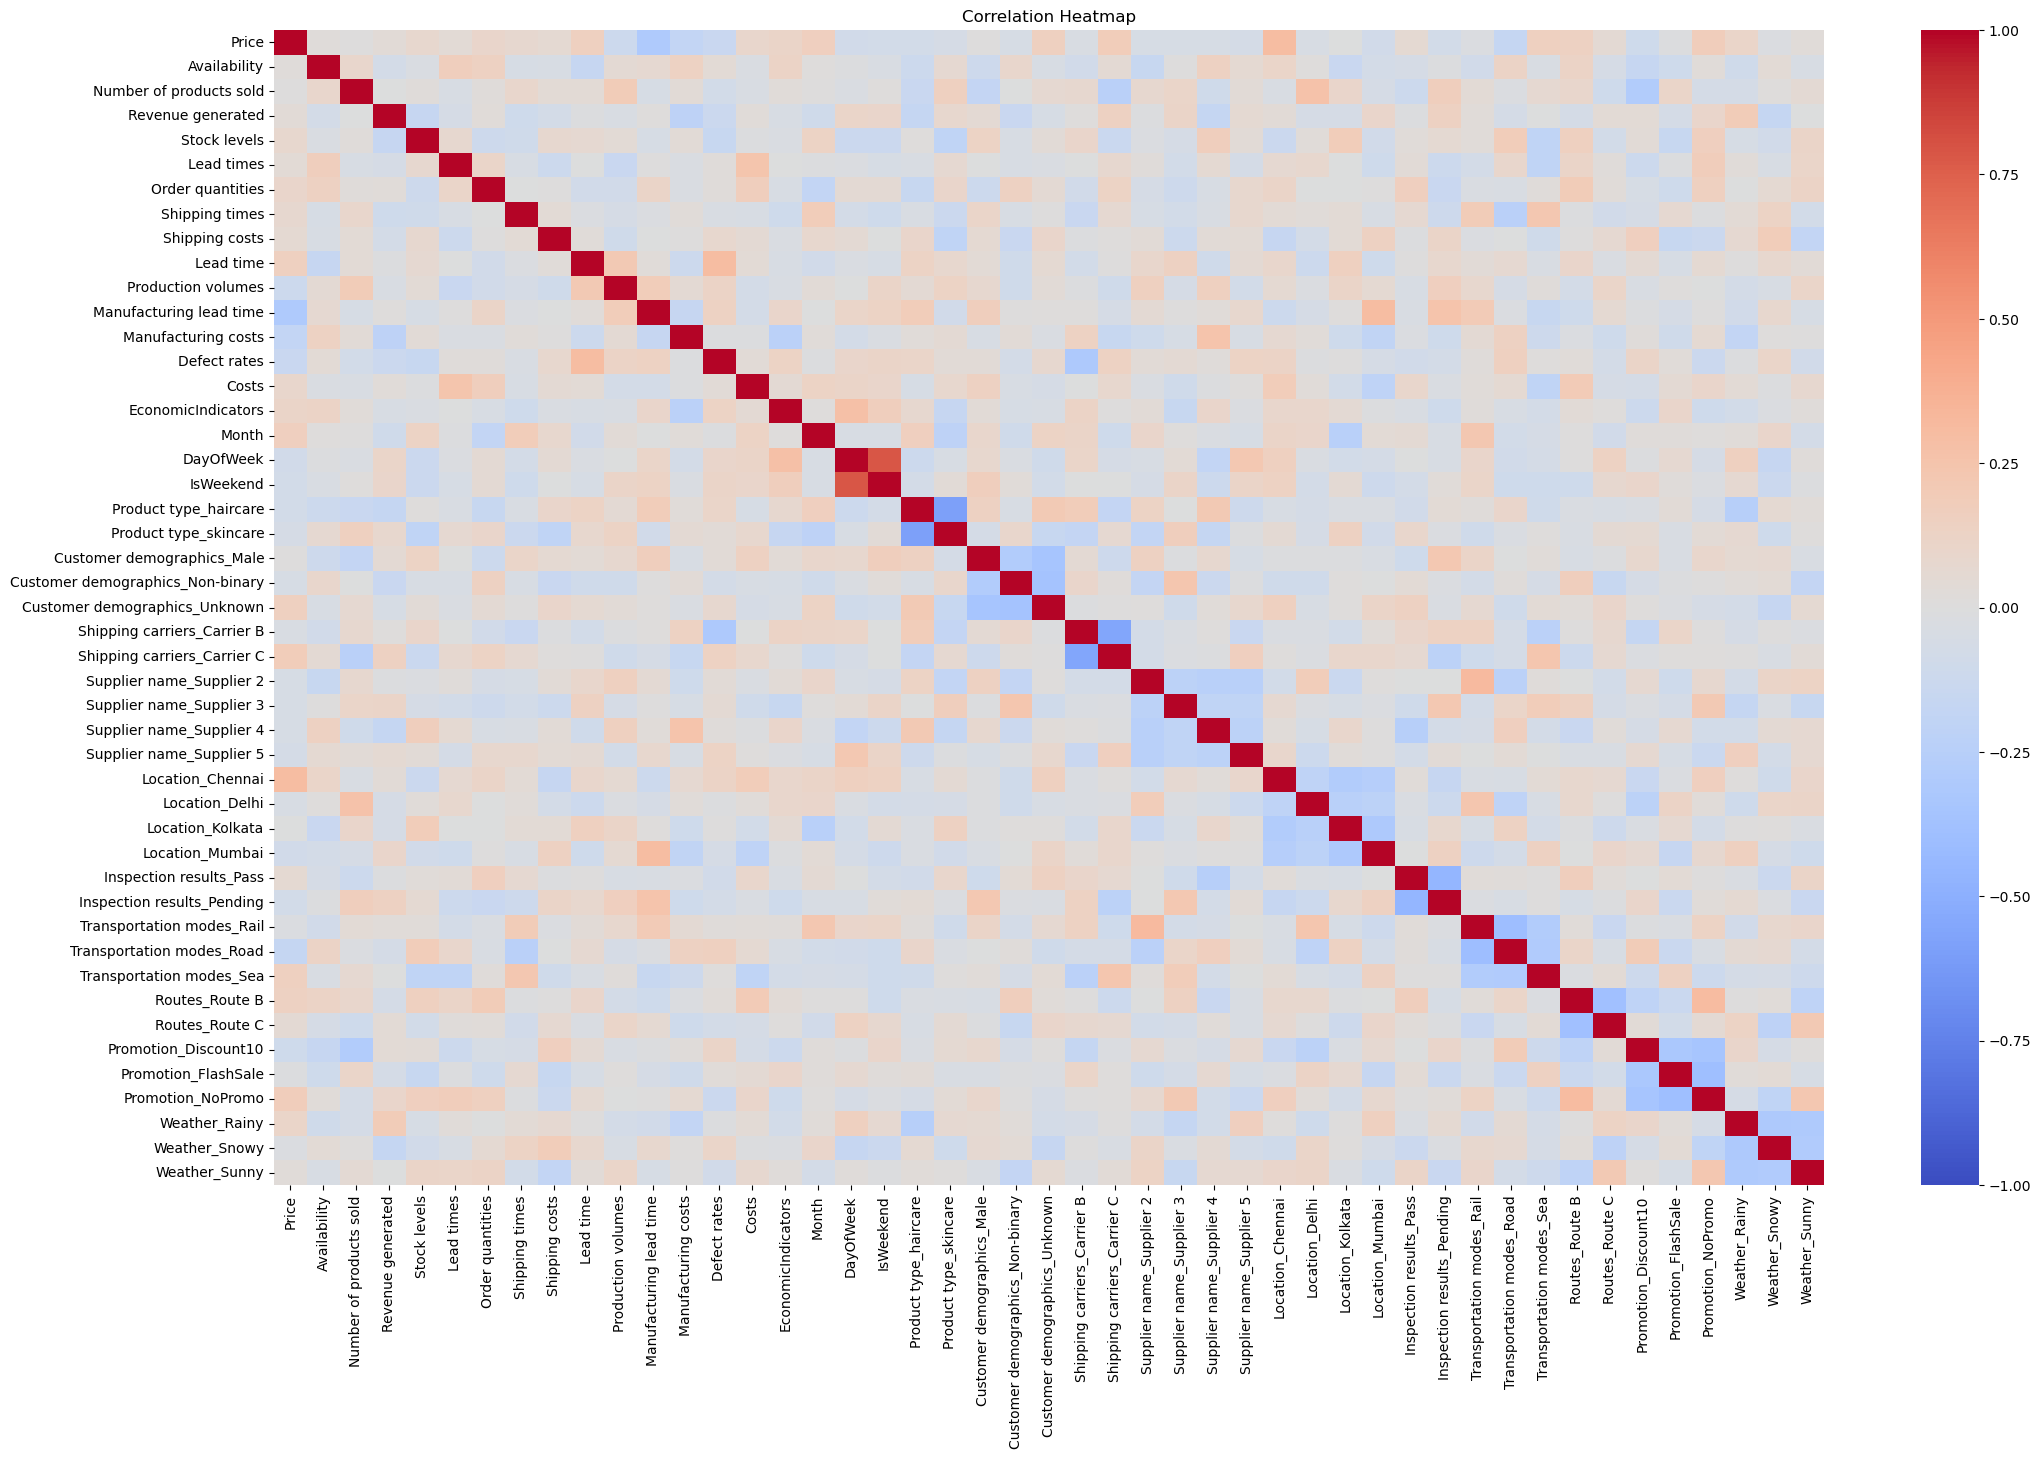

In [15]:
plt.figure(figsize=(25, 15))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


Remove Features with High Correlation

In [17]:
#import numpy as np

# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True).abs()

# Keep the upper triangle (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Highly correlated features to drop:", to_drop)

# Drop those features
df_final = df_encoded.drop(columns=to_drop)

display(df_final.head())


NameError: name 'np' is not defined

<h1 style="font-size:32px; color:Black;">Step 4: Model Building</h1>

Define Features and Target

In [18]:
X = df_encoded.drop(columns=['Number of products sold']) #features
y = df_encoded['Number of products sold']               #target

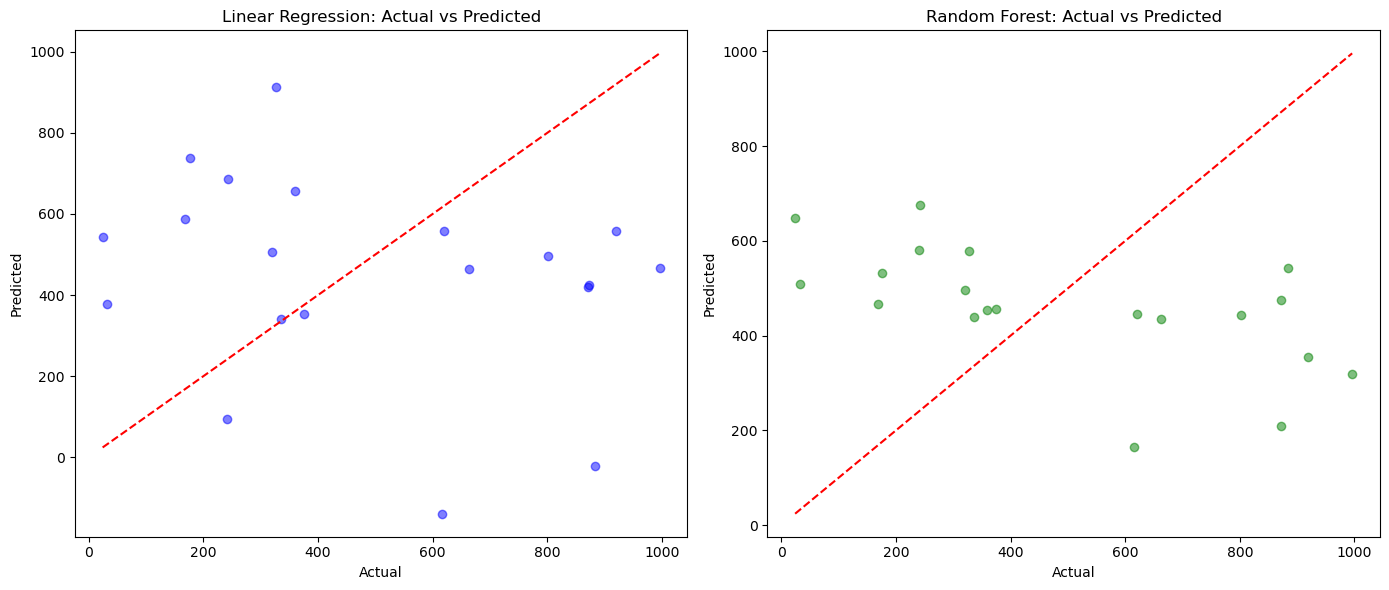

In [19]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Initial Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Plotting Actual vs Predicted for Both Models
#import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


<h1 style="font-size:32px; color:Black;">Step 5: Model Evaluation</h1>

Evaluation Function


Linear Regression Evaluation:
RMSE: 441.92
R² Score: -1.05


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


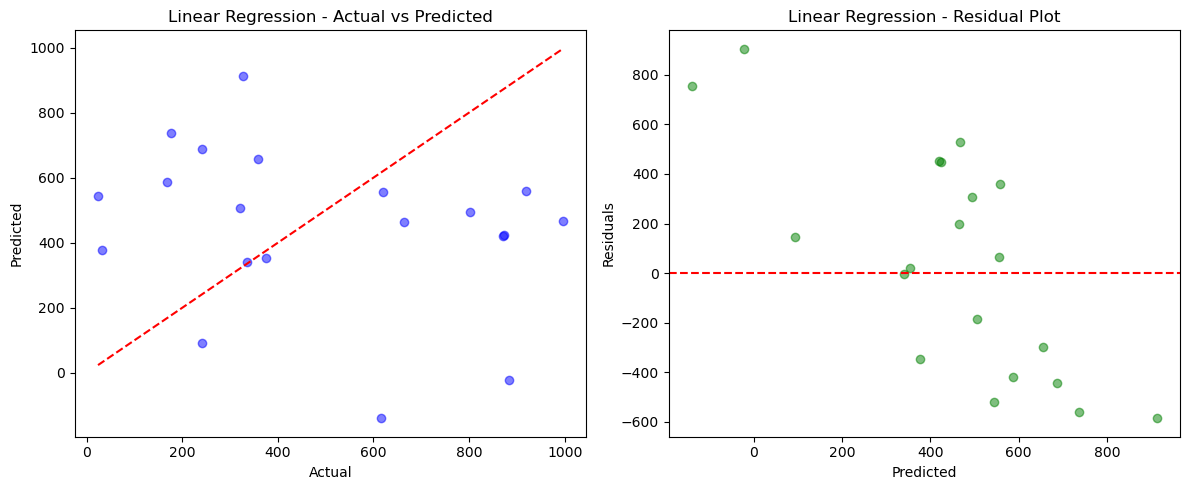


Random Forest Evaluation:
RMSE: 397.62
R² Score: -0.66


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


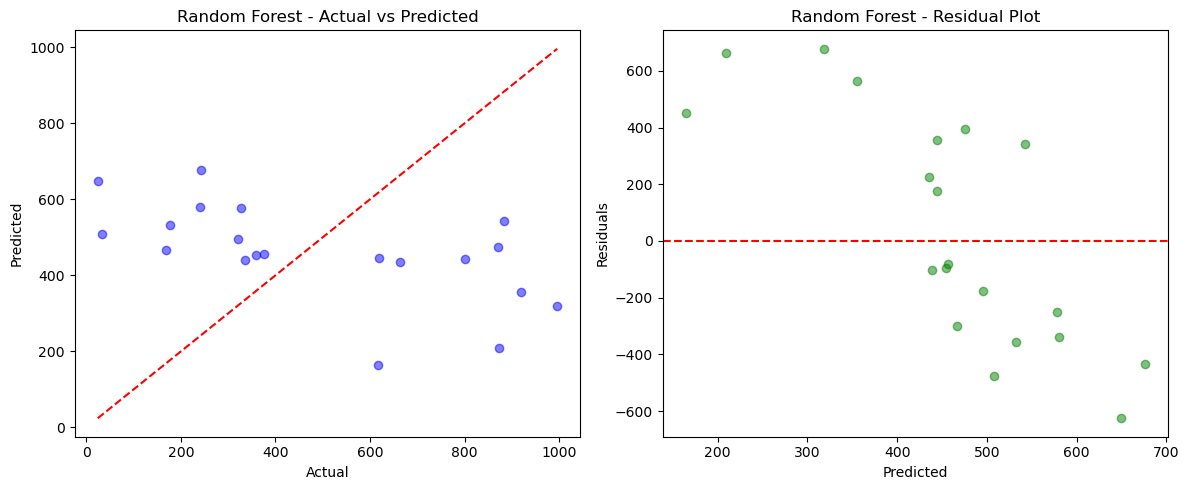

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation Function with Plots
def evaluate_model(name, y_true, y_pred):
    # Print Metrics
    print(f"\n{name} Evaluation:")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    
    # Set up the plot
    plt.figure(figsize=(12, 5))

    # Plot 1: Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")

    # Plot 2: Residuals
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residual Plot")
    plt.savefig(f"{name.replace(' ', '_')}_evaluation_plot.png")  # <-- Save plot as PNG

    plt.tight_layout()
    plt.show()


# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


<h1 style="font-size:32px; color:Black;">Step 6: Feature Importance</h1>

Extract and Plot Features Importance Values

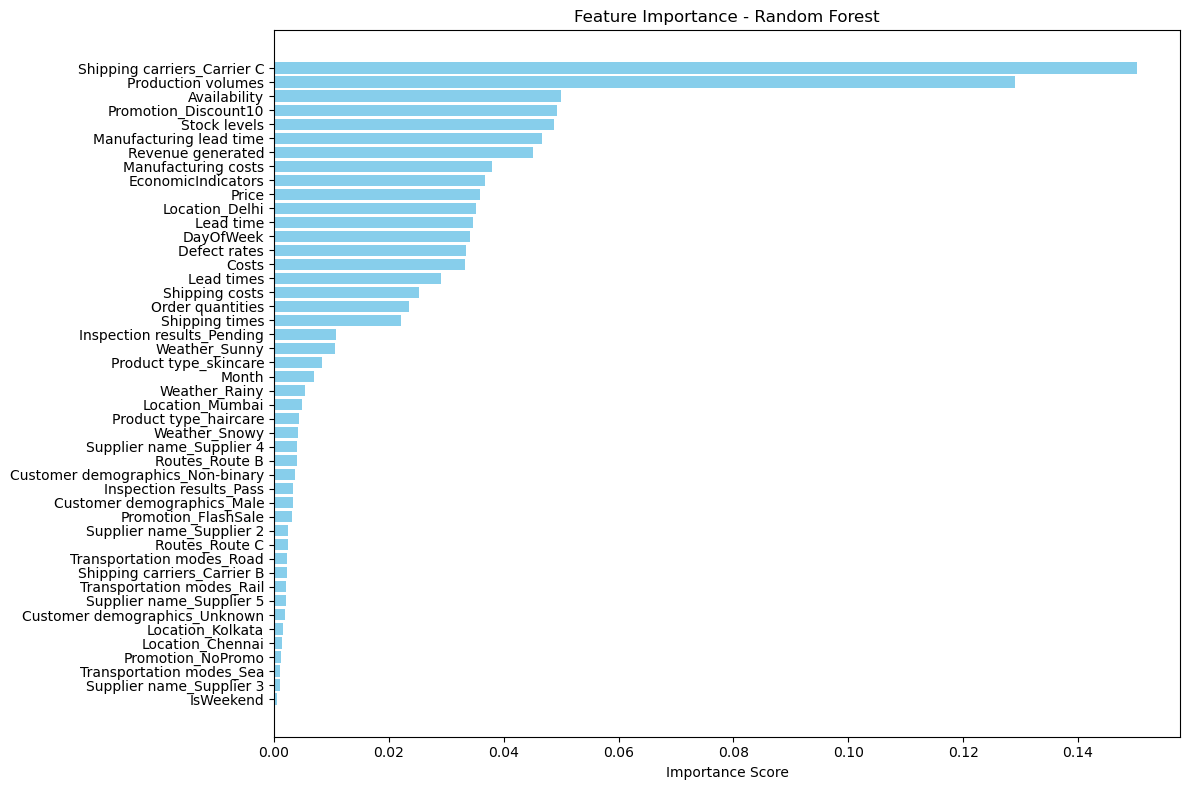

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# 1. Save the feature names (used later for Streamlit prediction alignment)
joblib.dump(X.columns.tolist(), "model_features.pkl")

# 2. Get feature importances from trained model
importances = rf.feature_importances_  # Make sure `rf` is your trained RandomForestRegressor
features = X.columns

# 3. Create and sort a DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(12, 8))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


Keep top feature

In [22]:
#import pandas as pd

# Make sure these are already available
importances = rf.feature_importances_
features = X.columns

# Combine into a DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)


In [23]:
# Choose top N
top_n = 10

# Select top N features
top_features = fi_df.head(top_n)['Feature'].tolist()

# Create reduced X
X_reduced = X[top_features]


In [24]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [25]:
#from sklearn.ensemble import RandomForestRegressor

rf_reduced = RandomForestRegressor(random_state=42)
rf_reduced.fit(X_train, y_train)
y_pred_reduced = rf_reduced.predict(X_test)



Random Forest (Top Features) Evaluation:
RMSE: 405.45
R² Score: -0.72


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


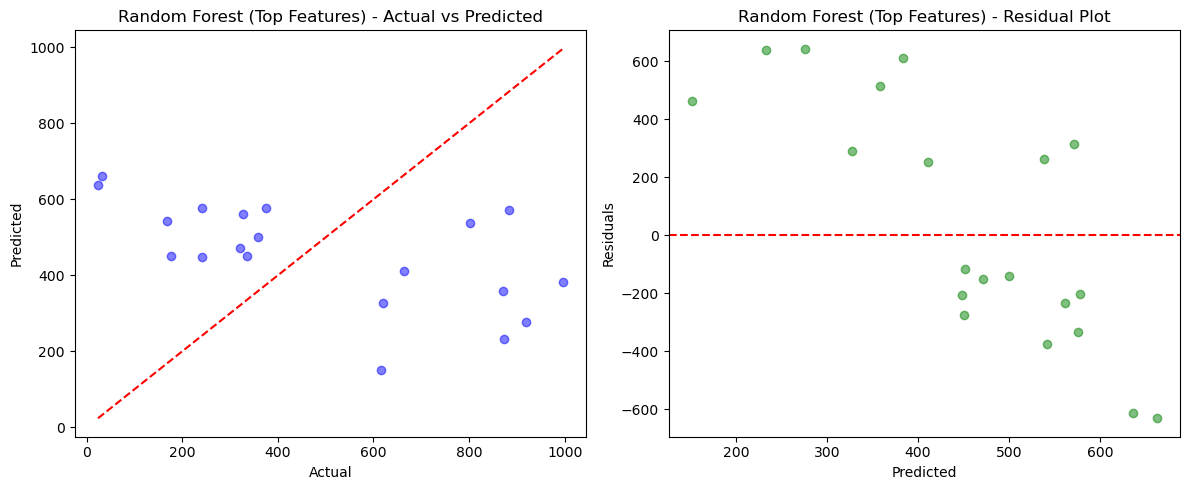

In [26]:
evaluate_model("Random Forest (Top Features)", y_test, y_pred_reduced)

Visualize before and after performance

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


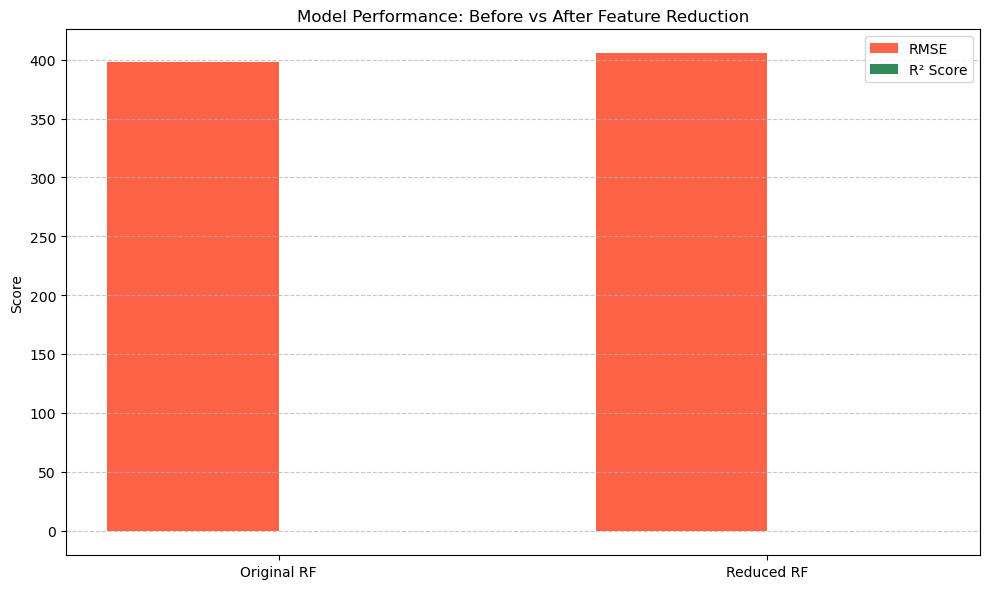

In [27]:
#Store the evaluation metrics

from sklearn.metrics import mean_squared_error, r2_score

# Store metrics for original model
rmse_orig = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_orig = r2_score(y_test, y_pred_rf)

# Store metrics for reduced model
rmse_reduced = mean_squared_error(y_test, y_pred_reduced, squared=False)
r2_reduced = r2_score(y_test, y_pred_reduced)



#Plot Comparison
import matplotlib.pyplot as plt
import numpy as np

models = ['Original RF', 'Reduced RF']
rmse_scores = [rmse_orig, rmse_reduced]
r2_scores = [r2_orig, r2_reduced]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
ax1.bar(x - width/2, rmse_scores, width, label='RMSE', color='tomato')

# Plot R²
ax1.bar(x + width/2, r2_scores, width, label='R² Score', color='seagreen')

# Add text, labels, and formatting
ax1.set_ylabel('Score')
ax1.set_title('Model Performance: Before vs After Feature Reduction')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h1 style="font-size:32px; color:Black;">Step 7: Hyperparameter Tuning</h1>

In [28]:
#Define the search space

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [60]:
#Set up RandomizedSearchCV

# Base model
rf_base = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try (adjust if slow)
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'  # for RMSE
)


In [62]:
#Fit the Model

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [64]:
#Best Parameters and Model

# Get best model and parameters
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}



Tuned Random Forest Evaluation:
RMSE: 390.65
R² Score: -0.60


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


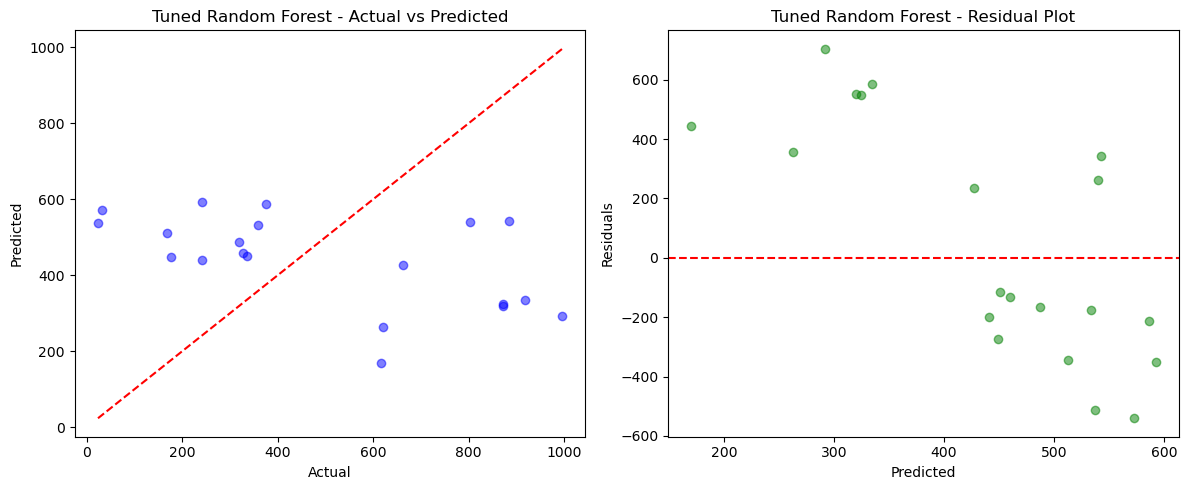

In [66]:
#Predict and Evaluate

from sklearn.metrics import mean_squared_error, r2_score

y_pred_tuned = best_rf.predict(X_test)

# You already have this function
evaluate_model("Tuned Random Forest", y_test, y_pred_tuned)


Saved the Best Model or Parameters

In [67]:
import joblib
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')


['tuned_random_forest_model.pkl']

Visualization Plot before and after Tuning

Final Code - Annotated + Saved RMSE and R2 Comparison Plots

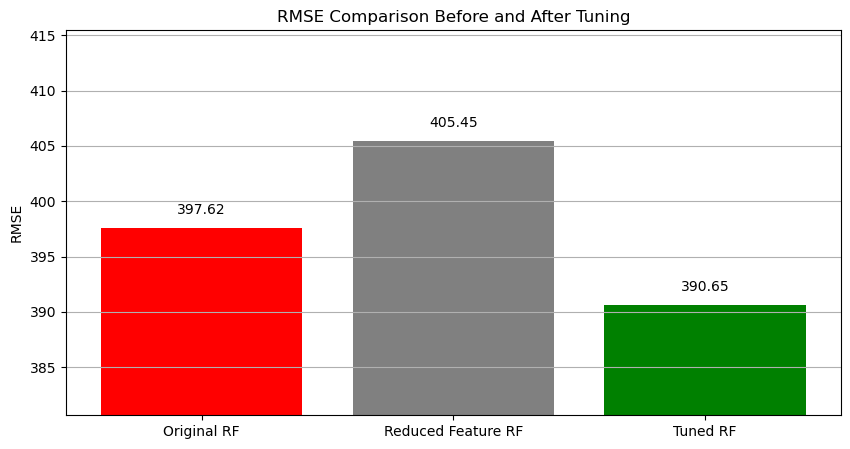

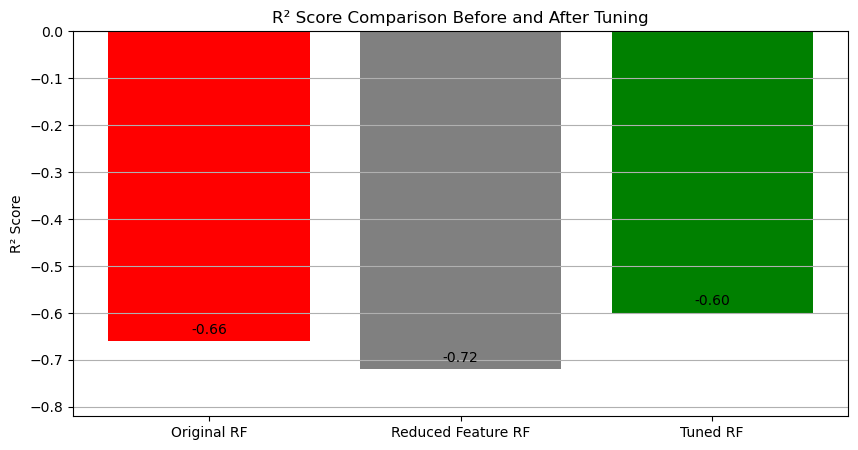

In [70]:
import matplotlib.pyplot as plt

# Data
models = ['Original RF', 'Reduced Feature RF', 'Tuned RF']
rmse_values = [397.62, 405.45, 390.65]
r2_values = [-0.66, -0.72, -0.60]

# --- RMSE Plot ---
plt.figure(figsize=(10, 5))
bars = plt.bar(models, rmse_values, color=['red', 'gray', 'green'])
plt.title('RMSE Comparison Before and After Tuning')
plt.ylabel('RMSE')
plt.ylim(min(rmse_values) - 10, max(rmse_values) + 10)
plt.grid(axis='y')

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height:.2f}', ha='center', va='bottom')

# Save the plot
plt.savefig("rmse_comparison_plot.png", dpi=300, bbox_inches='tight')
plt.show()


# --- R² Score Plot ---
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_values, color=['red', 'gray', 'green'])
plt.title('R² Score Comparison Before and After Tuning')
plt.ylabel('R² Score')
plt.ylim(min(r2_values) - 0.1, 0)
plt.grid(axis='y')

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

# Save the plot
plt.savefig("r2_comparison_plot.png", dpi=300, bbox_inches='tight')
plt.show()


Streamlit Dashboard Code

In [78]:
streamlit_code = """

import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt


# Load model and feature columns
model = joblib.load('tuned_random_forest_model.pkl')
trained_features = joblib.load('model_features.pkl')

# Page settings
st.set_page_config(page_title="Demand Forecasting", layout="wide")
st.title("🧠 Demand Forecasting Dashboard")
st.markdown("This dashboard predicts **Number of Products Sold** using your trained Random Forest model.")

# File uploader
st.header("📤 Upload Your CSV Data")
uploaded_file = st.file_uploader("Upload a CSV file with feature data (no target column)", type="csv")

if uploaded_file is not None:
    # Read and preview
    data = pd.read_csv(uploaded_file)
    st.subheader("📋 Uploaded Data Preview")
    st.dataframe(data.head())

    # Remove target column if it exists
    if 'Number of products sold' in data.columns:
        data = data.drop(columns=['Number of products sold'])

    # One-hot encode the uploaded data
    data_encoded = pd.get_dummies(data)

    # Reindex to match training features (missing columns will be filled with 0)
    data_encoded = data_encoded.reindex(columns=trained_features, fill_value=0)

    # Prediction button
    if st.button("🔮 Predict"):
        try:
            predictions = model.predict(data_encoded)
            data['Predicted Sales'] = predictions
            st.success("✅ Predictions generated successfully!")
            st.subheader("📈 Predicted Results")
            st.dataframe(data[['Predicted Sales']].head())

            # Download button
            st.download_button(
                label="📥 Download Predictions",
                data=data.to_csv(index=False),
                file_name="predicted_sales.csv",
                mime='text/csv'
            )
        except Exception as e:
            st.error(f"❌ Error during prediction: {e}")

# Show model evaluation plots
st.header("📊 Model Performance Plots")
st.image("rmse_comparison_plot.png", caption="RMSE Comparison: Before vs. After Tuning", use_column_width=True)
st.image("r2_comparison_plot.png", caption="R² Score Comparison: Before vs. After Tuning", use_column_width=True)

st.markdown("---")
st.markdown("🔧 Built by Jianlumei Kamei | Powered by Streamlit")

"""
with open("app.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)


Merging code for rmse and r2

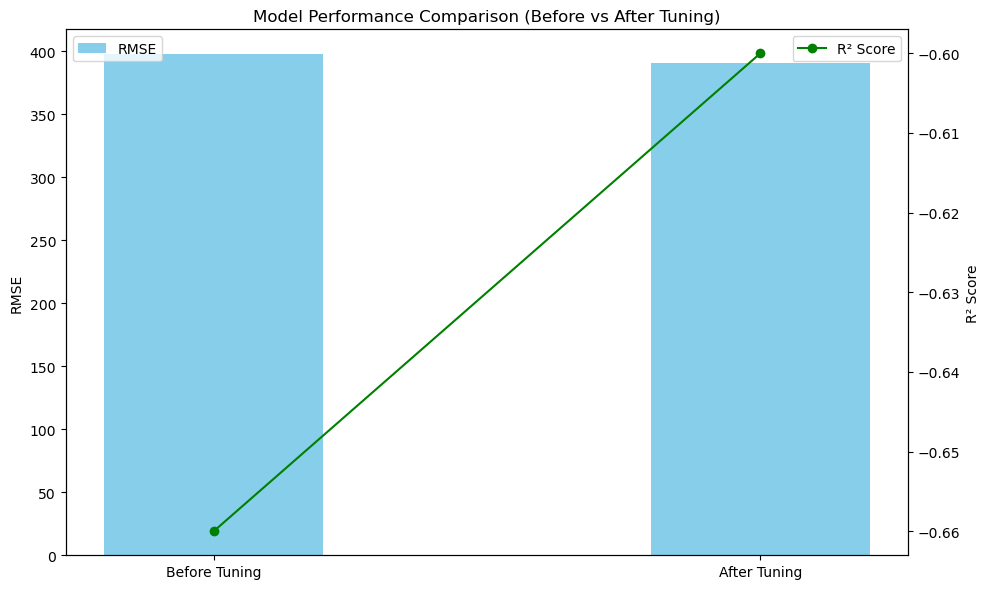

In [1]:
import matplotlib.pyplot as plt

# Performance values (example — replace with your actual values)
models = ['Before Tuning', 'After Tuning']
rmse_values = [397.62, 390.65]
r2_values = [-0.66, -0.60]

x = range(len(models))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for RMSE
ax1.bar(x, rmse_values, width=0.4, label='RMSE', align='center', color='skyblue')
ax1.set_ylabel('RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance Comparison (Before vs After Tuning)')

# Plot R2 on right Y-axis
ax2 = ax1.twinx()
ax2.plot(x, r2_values, label='R² Score', color='green', marker='o')
ax2.set_ylabel('R² Score')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("rmse_r2_comparison_plot.png")
plt.show()


In [29]:
X.sample(1).to_csv("sample_input.csv", index=False)
